<a href="https://colab.research.google.com/github/rhobaker/Data_Project/blob/main/Main_Jupyter_workbook_Rhona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all libraries needed for the project
import requests as requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as requests
from functools import reduce

# Introduction to the project

>> Need to choose a colour palette that will work for the whole workbook #testt

The aim of our project was to examine the evidence that a proposed bill being put before the UK Parliament will be effective in reducing smoking rates in the UK.

The long title of this bill is:

> A Bill to Make provision about the supply of tobacco, vapes and other products, including provision prohibiting the sale of tobacco to people born on or after 1 January 2009; and to enable product requirements to be imposed in connection with tobacco, vapes and other products.

https://bills.parliament.uk/bills/3703

The Bill will prohibit the sale of cigarettes to people born after 2008.  Each year the age at which people can legally buy cigarettes will increase, resulting in people born after 31st December 2008 never being able to buy them.  This will be enforced by fining organisations who break the law.  The government believes that this will reduce the harm caused by smoking, which is still the number one cause of preventable deaths in the UK and costs the NHS £17bn a year.


https://www.bbc.co.uk/news/health-68825322#:~:text=The%20restrictions%20will%20apply%20to,able%20to%20legally%20buy%20cigarettes.



To analyse how effective this ban might be we used evidence from a number of data sources to answer two questions:

**<span style="color:darkblue">Question One:</span>**\
**How effective does historic data suggest that government mitigations have been on affecting smoking prevalence?**

**<span style="color:darkblue">Question Two:</span>**\
**Based on this analysis, how effective will the new ban be on reducing smoking prevalence?**



## <span style="color:darkblue"> Question One: </span>
### **How effective does historic data suggest that government mitigations have been on affecting smoking prevalence?**

### Analysis One:  Changes in global smoking rates compared to levels of government intervention

Using data from the WHO we have analysed how effective government measures have been on reducing rates of smoking globally, in order to determine how effective government measures are in general at reducing smoking rates.


The WHO adopted the WHO Framework Convention on Tobacco Control on 21 May 2003 as a response to the global tobacco epidemic.  It uses the MPOWER package to help countries reduce their smoking rates by reducing the demand for tobacco products from their population.  It has six different strands:


- **M**: Monitor tobacco use and prevention policies
- **P**: Protect people from tobacco smoke
- **O**: Offer help to quit tobacco use
- **W**: Warn about the dangers of tobacco
- **E**: Enforce bans on tobacco advertising, promotion and sponsorship
- **R**: Raise taxes on tobacco

Reference: https://www.who.int/initiatives/mpower

#### Data Analysis

The WHO categorises each of these strands into 5 levels to based on how well they have been implemented in each country, with 1 being the lowest level of control and 5 being the greatest.  This data is publically avaliable via an API.

We used this API to get a total score per country for each of the years it is available.  This was used to calculate a weighted mean level of implementation for the world as a whole, based on the population of each country.

By comparing this to global smoking rates, also avaliable via an API, we prepared an analysis to see if there is a relationship between the adoption of these initiatives and the global smoking rate.

Reference: https://www.who.int/data/gho/data/themes/topics/indicator-groups/indicator-group-details/GHO/tobacco-control---progress-towards-selected-tobacco-control-policies-for-demand-reduction

In [ ]:
# Get all API data needed from the WHO and save as JSON files

# Define the urls for each of the APIs needed:
# Global smoking rates by year:
url_sr = "https://ghoapi.azureedge.net/api/M_Est_tob_curr_std?$filter=SpatialDimType%20eq%20%27GLOBAL%27"
# Levels of smoking intervention prevelance:
urlM = "https://ghoapi.azureedge.net/api/M_Group"
urlP = "https://ghoapi.azureedge.net/api/P_Group"
urlO = "https://ghoapi.azureedge.net/api/O_Group"
urlW = "https://ghoapi.azureedge.net/api/W_Group"
urlE = "https://ghoapi.azureedge.net/api/E_Group"
urlR = "https://ghoapi.azureedge.net/api/R_Group"
# World population by country:
urlpop = "https://ghoapi.azureedge.net/api/RS_1845"

#Use request module to get the API data and save in a variable:
response_sr = requests.get(url_sr)
responseM = requests.get(urlM)
responseP = requests.get(urlP)
responseO = requests.get(urlO)
responseW = requests.get(urlW)
responseE = requests.get(urlE)
responseR = requests.get(urlR)
responsepop = requests.get(urlpop)

#Turn response into JSON data:
json_data_rate = response_sr.json()
json_data_M = responseM.json()
json_data_P = responseP.json()
json_data_O = responseO.json()
json_data_W = responseW.json()
json_data_E = responseE.json()
json_data_R = responseR.json()
json_data_pop = responsepop.json()

#Check that the data has been imported and give an error message if not:
if response_sr.status_code == 200 & responseM.status_code == 200 & responseP.status_code == 200 & responseP.status_code == 200 & responseO.status_code == 200 & responseW.status_code == 200 & responseE.status_code == 200 & responseR.status_code == 200 & responsepop.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

Data was retrieved


In [ ]:
# Create a panda's DataFrame for global smoking rates:

# Set empty arrays to append data into:
sr_value = [] # For rates
sr_time = [] # For years

# Loop through the API data and append data to the empty arrays
for i in json_data_rate["value"]:
    if i["Dim1"] == "SEX_BTSX":  # Data for both sexes together
        sr_value.append(i["NumericValue"])
        sr_time.append(i['TimeDimensionValue'])

# Create lists for the data and for the column labels needed in the DataFrame
data = list(zip(sr_time, sr_value))
label = ["Year", "Smoking Rate"]

#Create the DataFrame
df_rate = pd.DataFrame(data, columns = label)
# Turn the data into numeric values for calculations to be performed and graphs produced
df_rate = df_rate.apply(pd.to_numeric, errors='coerce')
# Set the year as the DataFrame's index
df_rate = df_rate.set_index("Year")
# Check the result
df_rate

,Smoking Rate
Year,
2007,28.1
2000,32.7
2030,18.1
2005,29.3
2021,21.3
2010,26.4
2022,20.9
2018,22.5
2015,23.9


In [ ]:
# Create a panda's DataFrame for population data:

# Set empty arrays to append data into
indexpop = [] # For the country code
valuepop = [] # For the population

# Loop through API data and append values to the empty arrays
for i in json_data_pop["value"]:
    indexpop.append(i["SpatialDim"])
    valuepop.append(i["Value"])

# Create lists for the data and for the column labels needed in the DataFrame
data = list(zip(indexpop, valuepop))
label = ["Code", "Population"]

# Create the DataFrame
df_pop = pd.DataFrame(data, columns = label)

# Clean the spaces out of the numerical data in order to be able to use it for a calculation
df_pop['Population'] = df_pop['Population'].str.replace(' ', '')

# Turn the population value into an integer so it can be used for a calculation
df_pop["Population"] = pd.to_numeric(df_pop["Population"])

# Set the Code column to the DataFrame index
df_pop = df_pop.set_index("Code")
# Check the result
df_pop

,Population
Code,
ARM,3092072
ZMB,13088570
POL,38276660
IRL,4469900
MLI,15369809
...,...
BRA,194946488
GEO,4352244
PRK,24346229


In [ ]:
# Calculate the total global population and save in a variable for use in the weighted mean calculation
total_pop = sum(df_pop["Population"])
total_pop

6787737744

In [ ]:
# Create a panda's DataFrame for MPOWER data:

# Set empty arrays to append data into:
mpower_index = [] # For the country code
mpower_time = [] # For the year
mpower_value = [] # For the value

# Create a list of all files to append data for:
List_of_json = [json_data_M, json_data_P, json_data_O, json_data_W, json_data_E, json_data_R]

for i in List_of_json:
    for j in i["value"]:
        mpower_index.append(j["SpatialDim"])
        mpower_time.append(j["TimeDimensionValue"])
        mpower_value.append(j["Value"])

# Create lists for the data and for the column labels needed in the DataFrame
data = list(zip(mpower_index, mpower_time, mpower_value))
label = ["Code", "Year", "Value"]

# Create the DataFrame
df_MPOWER = pd.DataFrame(data, columns = label)
# Replace "Not applicable" with 1 - the lowest level possible
df_MPOWER = df_MPOWER.replace("Not applicable", 1)

# Turn column "Value" into numeric to be able to calculate the mean
df_MPOWER["Value"] = df_MPOWER["Value"].apply(pd.to_numeric, errors='coerce')

# Create a DataFrame of a pivot table to get the total MPOWER score for each country
df_MPOWER_pivot = pd.DataFrame(df_MPOWER.pivot_table(values='Value', index="Code", columns = "Year", aggfunc = np.sum))
# Check the result
df_MPOWER_pivot


Year,2007,2008,2010,2012,2014,2016,2018,2020,2022
Code,,,,,,,,,
AFG,14,15,15,15,17,21,19,19,18
AGO,11,12,12,13,13,12,16,16,16
ALB,19,24,24,25,24,24,24,25,25
AND,13,12,15,17,17,17,18,18,18
ARE,15,19,20,22,22,21,24,24,23
...,...,...,...,...,...,...,...,...,...
WSM,13,20,20,20,23,24,23,22,22
YEM,16,19,18,19,22,22,22,21,20
ZAF,15,17,18,18,19,19,17,17,18


In [ ]:
# Merge pivot tables with population
# Inner merge used in order to only have data where there is a poplulation number
merged_dataframe = pd.merge(df_pop, df_MPOWER_pivot, left_index=True, right_index=True, how='inner')
merged_dataframe

,Population,2007,2008,2010,2012,2014,2016,2018,2020,2022
Code,,,,,,,,,,
ARM,3092072,16,17,17,19,20,21,21,25,25
ZMB,13088570,13,16,15,16,16,16,17,17,17
POL,38276660,18,22,23,23,23,25,25,25,25
IRL,4469900,22,26,26,27,27,28,28,28,28
MLI,15369809,12,14,16,17,15,17,17,17,16
...,...,...,...,...,...,...,...,...,...,...
BRA,194946488,19,22,22,27,28,28,29,29,29
GEO,4352244,15,17,17,18,19,20,25,25,24
PRK,24346229,12,13,14,14,15,16,16,16,16


In [ ]:
# Multiply population by MPOWER score for the weighted mean calculation:

# Create a list of the years
df_MPOWER_pivot_columns = list(df_MPOWER_pivot.columns)

# Loop through the columns and multiply population by total MPOWER score
for i in df_MPOWER_pivot_columns:
    merged_dataframe[i] = merged_dataframe[i] * merged_dataframe["Population"]
merged_dataframe

,Population,2007,2008,2010,2012,2014,2016,2018,2020,2022
Code,,,,,,,,,,
ARM,3092072,49473152,52565224,52565224,58749368,61841440,64933512,64933512,77301800,77301800
ZMB,13088570,170151410,209417120,196328550,209417120,209417120,209417120,222505690,222505690,222505690
POL,38276660,688979880,842086520,880363180,880363180,880363180,956916500,956916500,956916500,956916500
IRL,4469900,98337800,116217400,116217400,120687300,120687300,125157200,125157200,125157200,125157200
MLI,15369809,184437708,215177326,245916944,261286753,230547135,261286753,261286753,261286753,245916944
...,...,...,...,...,...,...,...,...,...,...
BRA,194946488,3703983272,4288822736,4288822736,5263555176,5458501664,5458501664,5653448152,5653448152,5653448152
GEO,4352244,65283660,73988148,73988148,78340392,82692636,87044880,108806100,108806100,104453856
PRK,24346229,292154748,316500977,340847206,340847206,365193435,389539664,389539664,389539664,389539664


In [ ]:
# Add up each column in the table

# Set empty arrays to append data into:
total_year = []
total_mean = []

# Loop through the and append the weighted mean to the empty arrays
for i in df_MPOWER_pivot_columns:
    total_year.append(i)
    total_mean.append(merged_dataframe[i].sum()/total_pop)

# Create lists for the data needed in the DataFrame
data = list(zip(total_year, total_mean))

# Create a DataFrame of the weighted mean by year
mean_by_year = pd.DataFrame(data, columns = ["Year", "Weighted Mean MPOWER"])
# Turn all data into numeric values in order to plot them on the graph
mean_by_year = mean_by_year.apply(pd.to_numeric, errors='coerce')
# Set year as the index to merge with smoking rates
mean_by_year = mean_by_year.set_index("Year")
# Check the DataFrame
mean_by_year

,Weighted Mean MPOWER
Year,
2007,15.185550
2008,18.812244
2010,19.041077
2012,19.873850
2014,20.900575
2016,21.946641
2018,22.497117
2020,22.687553
2022,22.782868


In [ ]:
# Merge weighted mean with smoking rate
# Use outer merge as we want to plot data for all of the years
merged_rate_MPOWER = pd.merge(mean_by_year, df_rate, left_index=True, right_index=True, how='outer')
# Drop future years and past years without MPOWER data
cleaned_merged_rate_MPOWER = merged_rate_MPOWER.drop([2000, 2005,2025, 2030])
# Check result
cleaned_merged_rate_MPOWER

,Weighted Mean MPOWER,Smoking Rate
Year,,
2007,15.185550,28.1
2008,18.812244,NaN
2010,19.041077,26.4
2012,19.873850,NaN
2014,20.900575,NaN
2015,NaN,23.9
2016,21.946641,NaN
2018,22.497117,22.5
2020,22.687553,21.7


#### Calculate the Correlation

In [ ]:
# Calculate the correlation
print(merged_rate_MPOWER.corr())

                      Weighted Mean MPOWER  Smoking Rate
Weighted Mean MPOWER              1.000000     -0.963532
Smoking Rate                     -0.963532      1.000000


#### Plot the relationship

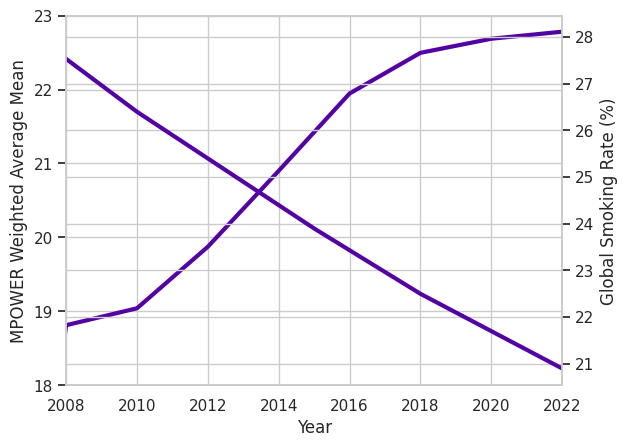

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a mask to smooth the data into a line as not all years have data
ratemask = np.isfinite(cleaned_merged_rate_MPOWER["Smoking Rate"])
MPOWERmask = np.isfinite(cleaned_merged_rate_MPOWER["Weighted Mean MPOWER"])

# Create the plot and set the axis values
sns.set_theme(style="whitegrid", palette="plasma")
fig, ax1 = plt.subplots()
plt.xlim(2008, 2022)
plt.ylim(18, 23)

# Plot the MPOWER values
ax1.set_xlabel('Year')
ax1.set_ylabel('MPOWER Weighted Average Mean')
ax1.plot(cleaned_merged_rate_MPOWER["Weighted Mean MPOWER"][MPOWERmask], lw = 3)
ax1.tick_params(axis ='y')


# Adding Twin Axes to plot smoking rates
ax2 = ax1.twinx()
ax2.set_ylabel('Global Smoking Rate (%)')
ax2.plot(cleaned_merged_rate_MPOWER["Smoking Rate"][ratemask], lw=3)
ax2.tick_params(axis ='y')

# Adding title
# plt.title('MPOWER Measures and Smoking Rates over Time')

# Show plot
plt.show()
plt.clf()

>> Need to work out how to add figure numbers to these, so we can refer to them through the notebook.

#### Conclusion
The data shows that there is a clear correlation globally between the number of measures in place to reduce demand for tobacco and the smoking rate.
This demonstrates that there is evidence that increasing the measures in place to reduce demand for tobacco products reduces smoking rates.

### Analysis One: How have smoking rates changed in the UK

The next step in our analysis was to determine if this global trend was also seen in the UK.
Over the last twenty years there has been increasing legal measures implemented by successive UK governments to reduce the rate of smoking.
A summary of these measures are outlined below:

#### Timeline of key government legislation and regulation

<img src="https://github.com/rhobaker/Data_Project/blob/main/Smoking_actions_timeline.png?raw=true" width="900" height="450"/>

>> Add figure number

Reference: https://news.cancerresearchuk.org/2023/03/07/ending-smoking-could-free-up-gp-appointments/

### Analysis One:  Changes in UK smoking rates

Our first task was to examine how the UK smoking rate has changed overtime, so it could be compared to other factors.
To do this we took data from the ONS Smoking Habits in the UK dataset.  We restricted this to the years from 2000 to 2019 as these are the years when the majority of government intervention has been seen.

In [ ]:
url = ("https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_adult_smoking_habits_in_great_britain/Table_1a-Table_1_cleaned.csv")
smokers = pd.read_csv(url)
smokers.drop(['Unnamed: 0'], axis=1, inplace=True)
#Getting relevant columns for visualisation
adults=smokers[["Year", "All 16+"]]
#Reversing the columns so that both datasets match
adults_reversed = adults.iloc[::-1]
adults_reversed
#Further qualifying the data so only data from the years 2000 is selected
adults_2000 = adults_reversed.iloc[13:33]
adults_2000 = adults_2000.reset_index()
adults_2000.drop(['index'], axis=1, inplace=True)
adults_2000.set_index("Year", inplace = True)
adults_2000.rename(columns={"All 16+": 'Smoking Rate'}, inplace=True)
adults_2000

,Smoking Rate
Year,
2000,27.0
2001,26.9
2002,25.9
2003,26.0
2004,24.6
2005,23.9
2006,22.0
2007,20.9
2008,21.1


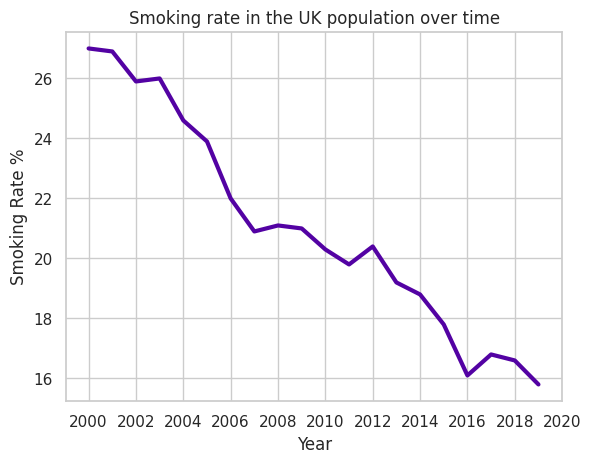

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid", palette="plasma")

plt.figure()
plt.plot(adults_2000["Smoking Rate"], lw=3)
plt.xticks([2000,2002,2004,2006,2008,2010,2012, 2014, 2016, 2018, 2020])
plt.xlabel("Year")
plt.ylabel("Smoking Rate %")
plt.title("Smoking rate in the UK population over time")
plt.show()
plt.clf()

It can be seen that the smoking rate has decreased from over 25% of the population in 2000 to just under 16% in 2019.  This has co-incided with the increase in legistation as described in Figure XX.  This is a reduction of around (58.89m x 27%) 15.9 million people in 2000 to (66.80m x 15.8%) around 10.6 million people in 2019, a fall of around 5.3 million people.

Ref: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatestimeseriesdataset

Our next step was to analyse what factors may be involved in this decline, in order to predict how any future changes may impact on this trend in the smoking rate.

## Analysis Three: The effect of taxation levels on the smoking rate

One of the ways in which governments have attempted to reduce smoking rates is through raising taxes on tobacco.\
The analysis below shows how the percentage of the cost of a packet of cigarettes that is made up by tax has increased in recent years.

In [ ]:
UK_tax_URL = "https://raw.githubusercontent.com/rhobaker/Data_Project/main/Cleaned_Data/UK_tax_rates_WHO.csv"
full_data = pd.read_csv(UK_tax_URL)
UK_tax_rates = full_data[["Period", "Value"]]
UK_tax_rates = UK_tax_rates.sort_values("Period", ascending = True)
UK_tax_rates

,Period,Value
7,2008,76.57
6,2010,76.74
5,2012,80.12
4,2014,82.16
3,2016,80.50
2,2018,85.51
1,2020,84.21
0,2022,83.72


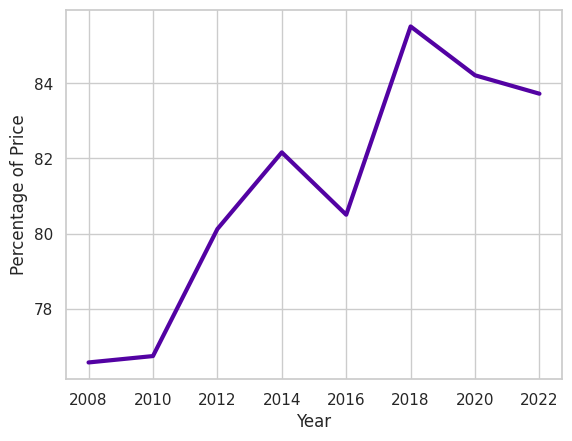

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the data
sns.set_theme(style="whitegrid", palette="plasma")
plt.figure()
plt.plot(UK_tax_rates["Period"],UK_tax_rates["Value"], lw=3)
plt.xticks([2008,2010,2012, 2014, 2016, 2018, 2020, 2022])
plt.ylabel('Percentage of Price')
plt.xlabel('Year')
plt.show()
plt.clf()

It is clear therefore that the UK government has been increasing the amount of tax applied to cigarettes in recent years.

To understand how this has impacted on the price of a packet of cigarettes we then analysed the amount of duty paid on 20 cigarettes from 2000 to 2022.

In [ ]:
# Load the CSV files
pre_may_2017_df = pd.read_csv('https://raw.githubusercontent.com/rhobaker/Data_Project/main/Historical%20Tobacco%20Duty%20rates/clean_historical_tobacco_duty_pre_may_2017.csv')
post_may_2017_df = pd.read_csv('https://raw.githubusercontent.com/rhobaker/Data_Project/main/Historical%20Tobacco%20Duty%20rates/clean_historical_tobacco_duty_post_may_2017.csv')
post_may_2017_df

,Date of change,Cigarettes ad valorem (%),Minimum excise tax £ per 1000 sticks,Specific £ per 1000 sticks,Cigars £ per kg,HRT £ per kg,TfH £ per kg,Other £ per kg
0,2017-05-20,16.5,268.63,207.99,259.44,209.77,234.65,114.06
1,2017-11-22,16.5,280.15,217.23,270.96,221.18,234.65,119.13
2,2018-10-29,16.5,293.95,228.29,284.76,234.65,234.65,125.20
3,2020-03-11,16.5,305.23,237.34,296.04,253.33,243.95,130.16
4,2020-11-16,16.5,320.90,244.78,305.32,271.40,251.60,134.24
5,2021-10-27,16.5,347.86,262.90,327.92,302.34,270.22,144.17
6,2023-03-15,16.5,393.45,294.72,367.61,351.03,302.93,161.62
7,2023-11-22,16.5,422.80,316.70,395.03,412.32,325.53,173.68


In [ ]:

price_url = 'https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_av_price_cigarettes_king_size_filter/Cleaned_ONS_av_price_cigarettes_king_size_filterce_cigarettes_king_size.csv'
price = pd.read_csv(price_url)
price

,year,Pence
0,1987,145
1,1988,150
2,1989,153
3,1990,170
4,1991,196
5,1992,214
6,1993,233
7,1994,245
8,1995,266
9,1996,279


In [ ]:
price['Price in £'] = price['Pence'] / 100
# price = price.set_index(["year"])
price

,year,Pence,Price in £
0,1987,145,1.45
1,1988,150,1.50
2,1989,153,1.53
3,1990,170,1.70
4,1991,196,1.96
5,1992,214,2.14
6,1993,233,2.33
7,1994,245,2.45
8,1995,266,2.66
9,1996,279,2.79


In [ ]:
# Ensure 'Date' columns are datetime types
# Ensure 'Date of change' columns are datetime types without converting parsing errors to NaT
pre_may_2017_df['Date of change'] = pd.to_datetime(pre_may_2017_df['Date of change'], format='%Y-%m-%d')
post_may_2017_df['Date of change'] = pd.to_datetime(post_may_2017_df['Date of change'], format='%Y-%m-%d')

In [ ]:
#Drop columns not needed
pre_may_2017_df.drop(columns=['Cigars £ per kg', 'HRT £ per kg', 'Other £ per kg'], inplace=True)
post_may_2017_df.drop(columns=['Cigars £ per kg', 'HRT £ per kg', 'Other £ per kg', 'TfH £ per kg'], inplace=True)


In [ ]:
combined_df = pd.concat([pre_may_2017_df, post_may_2017_df]).sort_values(by='Date of change').reset_index(drop=True)
combined_df

,Date of change,Cigarettes ad valorem (%),Specific £ per 1000 sticks,Minimum excise tax £ per 1000 sticks
0,1978-01-01,30.0,9.00,NaN
1,1979-08-13,21.0,11.77,NaN
2,1980-03-29,21.0,13.42,NaN
3,1981-03-14,21.0,18.04,NaN
4,1981-07-08,21.0,19.03,NaN
5,1982-03-12,21.0,20.68,NaN
6,1983-03-18,21.0,21.67,NaN
7,1984-03-16,21.0,24.97,NaN
8,1985-03-22,21.0,26.95,NaN
9,1986-03-21,21.0,30.61,NaN


In [ ]:
# Extract year from 'Date of change' column in combined_df
combined_df['Year'] = combined_df['Date of change'].dt.year

# Merge price with combined_df based on year and align prices
combined_df = combined_df.merge(price, how='left', left_on='Year', right_on='year')
# Create 'Retail price of King size pack in £' column
combined_df['Retail price of King size pack in £'] = np.where(combined_df['Year'] == combined_df['year'], combined_df['Price in £'], np.nan)
combined_df.drop(columns=['year', 'Price in £', 'Pence', 'Year'], inplace=True)
combined_df

,Date of change,Cigarettes ad valorem (%),Specific £ per 1000 sticks,Minimum excise tax £ per 1000 sticks,Retail price of King size pack in £
0,1978-01-01,30.0,9.00,NaN,NaN
1,1979-08-13,21.0,11.77,NaN,NaN
2,1980-03-29,21.0,13.42,NaN,NaN
3,1981-03-14,21.0,18.04,NaN,NaN
4,1981-07-08,21.0,19.03,NaN,NaN
5,1982-03-12,21.0,20.68,NaN,NaN
6,1983-03-18,21.0,21.67,NaN,NaN
7,1984-03-16,21.0,24.97,NaN,NaN
8,1985-03-22,21.0,26.95,NaN,NaN
9,1986-03-21,21.0,30.61,NaN,NaN


In [ ]:
import numpy as np

def calculate_duty(date):

    # Get the retail price for the given date
    retail_price = combined_df.loc[combined_df['Date of change'] == date, 'Retail price of King size pack in £'].iloc[0]
    # Check if the retail price is NaN
    if pd.isna(retail_price):
        return np.nan

    cigarettes_per_pack = 20

    if date < pd.to_datetime('2017-05-20'):
        # Historical duty pre-May 2017
        if not pre_may_2017_df.empty:
            pre_may_rows = pre_may_2017_df[pre_may_2017_df['Date of change'] <= date]
            if not pre_may_rows.empty:
                row = pre_may_rows.iloc[-1]
                specific_duty_per_pack = row['Specific £ per 1000 sticks'] / 50  # Adjusted duty for a pack
                ad_valorem_percentage = pd.to_numeric(row['Cigarettes ad valorem (%)'], errors='coerce')

                # Calculate the percentage duty for a pack
                percentage_duty = ad_valorem_percentage / 100 * retail_price
                # Total duty for a pack
                total_duty = percentage_duty + specific_duty_per_pack
            else:
                total_duty = 0  # No historical data available
        else:
            total_duty = 0  # No historical data available
    else:
        # Duty post-May 2017
        if not post_may_2017_df.empty:
            post_may_rows = post_may_2017_df[post_may_2017_df['Date of change'] <= date]
            if not post_may_rows.empty:
                row = post_may_rows.iloc[-1]
                specific_duty_per_pack = row['Specific £ per 1000 sticks'] / 50  # Adjusted duty for a pack
                minimum_excise_tax_per_pack = row['Minimum excise tax £ per 1000 sticks'] / 50  # Adjusted column name here
                ad_valorem_percentage = pd.to_numeric(row['Cigarettes ad valorem (%)'], errors='coerce')
                # Calculate the percentage duty for a pack
                percentage_duty = ad_valorem_percentage / 100 * retail_price
                # Total duty for a pack using specific duty plus percentage
                total_duty_1 = round(percentage_duty + specific_duty_per_pack, 2)
                # Total duty for a pack using minimum excise tax
                total_duty_2 = minimum_excise_tax_per_pack

                # Take the higher of the two total duties
                total_duty = max(total_duty_1, total_duty_2)
            else:
                total_duty = 0  # No post-May 2017 data available
        else:
            total_duty = 0  # No post-May 2017 data available

    return round(total_duty,2)

In [ ]:

combined_df['Duty'] = combined_df['Date of change'].apply(lambda x: calculate_duty(x))
combined_df

retail price nan
retail price nan
retail price nan
retail price nan
retail price nan
retail price nan
retail price nan
retail price nan
retail price nan
retail price nan
retail price 1.5
retail price 1.7
retail price 1.96
retail price 2.14
retail price 2.33
retail price 2.33
retail price 2.45
retail price 2.66
retail price 2.66
retail price 2.79
retail price 3.05
retail price 3.3
retail price 3.67
retail price 4.02
retail price 4.17
retail price 4.19
retail price 4.29
retail price 4.45
retail price 4.65
retail price 4.83
retail price 5.05
retail price 5.37
retail price 5.37
retail price 5.5
retail price 6.0
retail price 6.73
retail price 7.38
retail price 8.04
retail price 8.7
retail price 9.07
retail price 9.48
retail price 9.9
retail price 9.9
retail price 9.9
retail price 10.63
retail price 11.45
retail price 11.45
retail price 11.96
retail price 15.12
retail price 15.12


,Date of change,Cigarettes ad valorem (%),Specific £ per 1000 sticks,Minimum excise tax £ per 1000 sticks,Retail price of King size pack in £,Duty
0,1978-01-01,30.0,9.00,NaN,NaN,NaN
1,1979-08-13,21.0,11.77,NaN,NaN,NaN
2,1980-03-29,21.0,13.42,NaN,NaN,NaN
3,1981-03-14,21.0,18.04,NaN,NaN,NaN
4,1981-07-08,21.0,19.03,NaN,NaN,NaN
5,1982-03-12,21.0,20.68,NaN,NaN,NaN
6,1983-03-18,21.0,21.67,NaN,NaN,NaN
7,1984-03-16,21.0,24.97,NaN,NaN,NaN
8,1985-03-22,21.0,26.95,NaN,NaN,NaN
9,1986-03-21,21.0,30.61,NaN,NaN,NaN


In [ ]:

def drop_nan_duty_rows(df):
    # Drop rows where 'Duty' column is NaN
    df.dropna(subset=['Duty'], inplace=True)
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df



In [ ]:
drop_nan_duty_rows(combined_df)
combined_df

,Date of change,Cigarettes ad valorem (%),Specific £ per 1000 sticks,Minimum excise tax £ per 1000 sticks,Retail price of King size pack in £,Duty
0,1988-03-18,21.0,31.74,NaN,1.50,0.95
1,1990-03-23,21.0,34.91,NaN,1.70,1.06
2,1991-03-19,21.0,40.15,NaN,1.96,1.21
3,1992-03-10,21.0,44.32,NaN,2.14,1.34
4,1993-03-16,20.0,48.75,NaN,2.33,1.44
5,1993-11-30,20.0,52.33,NaN,2.33,1.51
6,1994-11-29,20.0,55.58,NaN,2.45,1.60
7,1995-01-01,20.0,57.64,NaN,2.66,1.68
8,1995-11-28,20.0,62.52,NaN,2.66,1.78
9,1996-11-26,21.0,65.97,NaN,2.79,1.91


In [ ]:
combined_df['% duty'] = combined_df.apply(lambda row: row["Duty"] / row["Retail price of King size pack in £"], axis = 1)
combined_df

,Date of change,Cigarettes ad valorem (%),Specific £ per 1000 sticks,Minimum excise tax £ per 1000 sticks,Retail price of King size pack in £,Duty,% duty
0,1988-03-18,21.0,31.74,NaN,1.50,0.95,0.633333
1,1990-03-23,21.0,34.91,NaN,1.70,1.06,0.623529
2,1991-03-19,21.0,40.15,NaN,1.96,1.21,0.617347
3,1992-03-10,21.0,44.32,NaN,2.14,1.34,0.626168
4,1993-03-16,20.0,48.75,NaN,2.33,1.44,0.618026
5,1993-11-30,20.0,52.33,NaN,2.33,1.51,0.648069
6,1994-11-29,20.0,55.58,NaN,2.45,1.60,0.653061
7,1995-01-01,20.0,57.64,NaN,2.66,1.68,0.631579
8,1995-11-28,20.0,62.52,NaN,2.66,1.78,0.669173
9,1996-11-26,21.0,65.97,NaN,2.79,1.91,0.684588


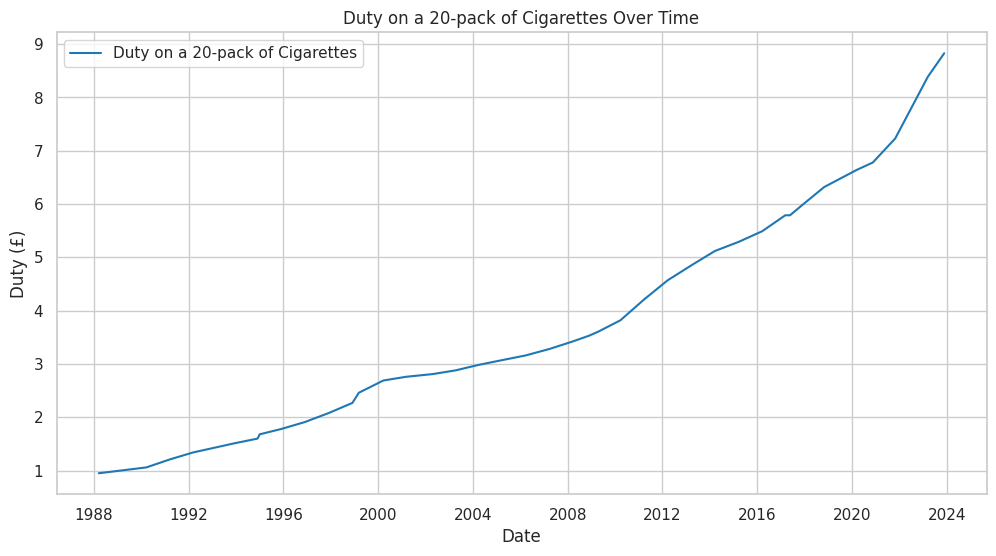

In [ ]:

# Plotting the duty over time
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date of change'], combined_df['Duty'], label='Duty on a 20-pack of Cigarettes', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Duty (£)')
plt.title('Duty on a 20-pack of Cigarettes Over Time')
plt.legend()
plt.grid(True)
plt.show()

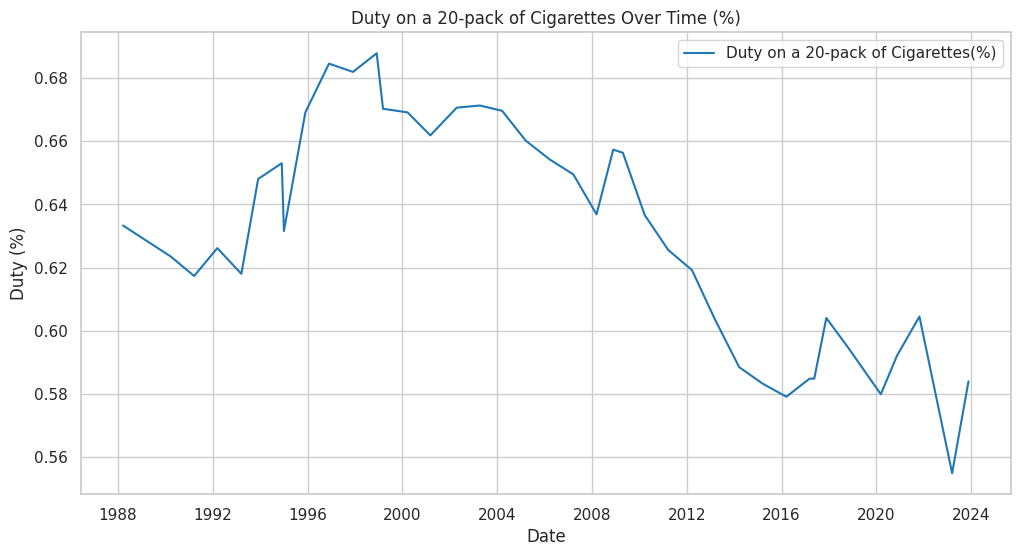

In [ ]:
# Plotting the duty over time
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date of change'], combined_df["% duty"], label='Duty on a 20-pack of Cigarettes(%)', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Duty (%)')
plt.title('Duty on a 20-pack of Cigarettes Over Time (%)')
plt.legend()
plt.grid(True)
plt.show()

>> Should this be a % ??

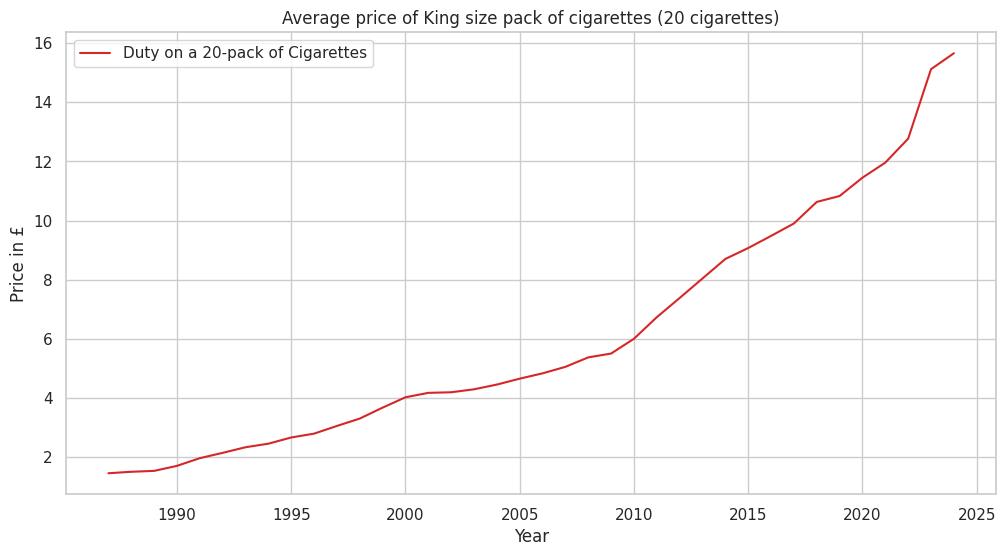

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(price['year'], price['Price in £'], label='Duty on a 20-pack of Cigarettes', color='tab:red')
plt.xlabel('Year')
plt.ylabel('Price in £')
plt.title('Average price of King size pack of cigarettes (20 cigarettes)')
plt.legend()
plt.grid(True)
plt.show()

>> Add RPI to show the difference in increase??

### Analysis Four:  The effect of affordability of tobacco on smoking prevalence



To understand how this has impacted on the affordability of tobacco products, we then analysed NHS publicly available datasets on the affordability of tobacco in England to see how this increase in tax has impacted it.

#### Import NHS affordability of tobacco dataset

In [ ]:
import pandas as pd

afford_url = 'https://raw.githubusercontent.com/rhobaker/Data_Project/main/NHS_smoking_eng_2020/Table_S.3.1-Table_1_cleaned.csv'

affordability = pd.read_csv(afford_url)
affordability.drop(['Unnamed: 0'], axis=1, inplace=True)
#Getting relevant columns for visualisation
affordability=affordability[["Year","Tobacco Price Index", "Retail Price Index", "Tobacco Affordability Index"]]
#Further qualifying the data so only data from the years 2000 is selected
affordability_2000 = affordability.iloc[13:33]
affordability_2000.set_index("Year", inplace = True)
affordability_2000

,Tobacco Price Index,Retail Price Index,Tobacco Affordability Index
Year,,,
2000,270.4,170.3,93.7
2001,285.1,173.3,93.1
2002,293.7,176.2,94.3
2003,304.1,181.3,94.8
2004,315.0,186.7,96.3
2005,328.7,192.0,96.2
2006,343.4,198.1,96.0
2007,361.6,206.6,97.1
2008,377.6,214.8,95.8


These numbers show that in the years from 2000 to 2019 the price of tobacco (the Tobacco Price Index) has increased by 190% ((786.1-270.4)/270.4).  In comparison, the price of other goods has increased by 70% ((288.8-170.3)/170.3).  As a result tobacco has become 28% less affordable ((93.7-67.3)/93.7).

To analyse these numbers further, we have compared the affordability of tobacco to the smoking rate.

In [ ]:
#Getting relevant columns for visualisation
adults=smokers[["Year", "All 16+"]]
#Reversing the columns so that both datasets match
adults_reversed = adults.iloc[::-1]
adults_reversed
#Further qualifying the data so only data from the years 2000 is selected
adults_2000 = adults_reversed.iloc[13:33]
adults_2000 = adults_2000.reset_index()
adults_2000.drop(['index'], axis=1, inplace=True)
adults_2000.set_index("Year", inplace = True)
adults_2000


,All 16+
Year,
2000,27.0
2001,26.9
2002,25.9
2003,26.0
2004,24.6
2005,23.9
2006,22.0
2007,20.9
2008,21.1


In [ ]:
# Merge datasets
merged_datasets = pd.DataFrame(pd.merge(adults_2000, affordability_2000, left_index=True, right_index=True, how='inner'))
merged_datasets.rename(columns={"All 16+": 'Smoking Rate'}, inplace=True)
merged_datasets

,Smoking Rate,Tobacco Price Index,Retail Price Index,Tobacco Affordability Index
Year,,,,
2000,27.0,270.4,170.3,93.7
2001,26.9,285.1,173.3,93.1
2002,25.9,293.7,176.2,94.3
2003,26.0,304.1,181.3,94.8
2004,24.6,315.0,186.7,96.3
2005,23.9,328.7,192.0,96.2
2006,22.0,343.4,198.1,96.0
2007,20.9,361.6,206.6,97.1
2008,21.1,377.6,214.8,95.8


### Affordability and Proportion of Smokers

In [ ]:
#Correlation coefficient
smoke_vape_young_coeff = np.corrcoef(merged_datasets["Smoking Rate"], merged_datasets["Tobacco Affordability Index"])
smoke_vape_young_coeff

array([[1.        , 0.84144322],
       [0.84144322, 1.        ]])

There is a strong correlation between the affordability of tobacco and the smoking rate.  As tobacco becomes less affordable, the smoking rate decreases.

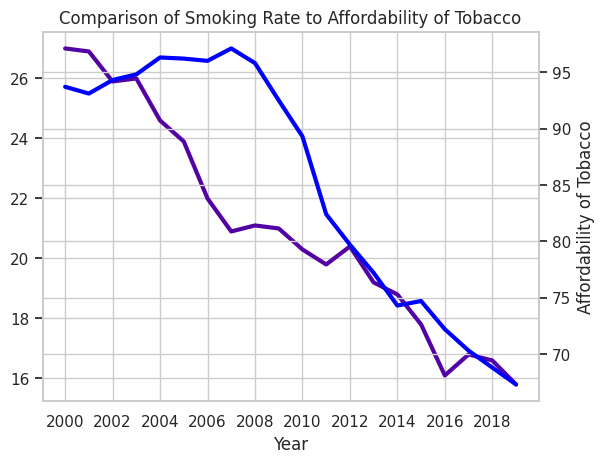

<Figure size 640x480 with 0 Axes>

In [ ]:
#Create a visualisation to compare the proportion of cigarette smokers vs the expenditure on tobacco
sns.set_theme(style="whitegrid", palette="plasma")
fig, ax10 = plt.subplots()
plt.title("Comparison of Smoking Rate to Affordability of Tobacco")
ax10.set_xlabel("Year")
# Plot smoking rate
plt.plot(merged_datasets['Smoking Rate'], lw=3)

ax10.set_ylabel = "Proportion of cigarette smokers (%)"
ax10.tick_params(axis='y')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])

# Adding Twin Axes to plot smoking rates
ax11 = ax10.twinx()
ax11.set_ylabel("Affordability of Tobacco")
plt.plot(merged_datasets['Tobacco Affordability Index'], lw=3, color="blue")
ax11.tick_params(axis='y')

# Show plot
plt.show()
plt.clf()

>> Need another vis in here - work out which one would fit best.

The proportion of cigarette smokers has generally decreased at a relatively steady rate, while the afforability of tobacco is more volatile as it responds to external economic factors.

Interestingly, we can see that the proportion of cigarette smokers has slightly increased in 2002, 2007 and 2011. This would seem counterintuitive with the 2007 indoor smoking ban - perhaps a response due to the heightened visibility of smoking in the media?

## Final thoughts

+ A relatively steady decline in the proportion of smokers in the UK can be seen dating back to the 1980s.
+ The affordability of tobacco has decreased since the 1980s but is somewhat more volatile and appears to respond to external economic factors. In cases where tobacco is relatively affordable, there is no comparable increase or more limited reduction in the proportion of smokers.
+ Household expenditure on tobacco does not reduce at the same rate as the proportion in smokers. We can in fact see an increase in tobacco expenditure from 2008 - 2010 despite both the continued reduction of the number of smokers and a sharp drop in tobacco affordability. This suggests that reducing the affordability of tobacco is of limited effectiveness as a measure to reduce the amount of tobacco consumed by those who are pre-existing smokers.
+ Increasing the price of tobacco is potentially most effective as a deterrant to prevent people from taking up smoking as a habit. It is of limited effectiveness as a tool to help people quit smoking.

>> Tie this back to the question more??

## Analysis Four: Changes in e-cigarette use

The proposed ban focuses on reducing smoking rates, but also acknowledges the issue of the use of e-cigarettes (a.k.a. vaping). Although e-cigarettes don't contain tobacco, the key factor causing cancer, they are not risk-free. The NHS recommends that young people should not take up vaping, a key concern, particularly with attractive 'flavours' such as fruit and sweets. The long-term side-effects of vaping are still unknown.

In order to analyse the effect e-cigarettes may have on smoking rates, we used the Office for National Statistics and NHS publicly available datasets on 'E-cigarette use in Great Britain', 'Adult smoking habits in Great Britain' and 'Smoking, drinking and drug use among young people'.

Recency in the datasets prevents us from analysing reported recent significant changes in e-cigarette use; the adult dataset goes up to 2022 but the youth set only up to 2021. To mitigate this, we have taken a small amount of data from written documents (all that was available) of the ASH Smokefree GB youth survey 2023.


#### Overall e-cigarette rates

In [ ]:
#Import vaping dataset
url = ("https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_ecigarette_use_in_great_britain/table1abc_cleaned.csv")

vapers = pd.read_csv(url)

vapers.drop(['Unnamed: 0'], axis=1, inplace=True)

vapers.head()

,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,2022,12.3,11.6,11.7,9.9,5.1,9.5,18.9,9.7,7.5,7.2,3.7,7.9,15.5,10.6,9.5,8.5,4.4,8.7
1,2021,13.0,13.3,12.0,7.9,5.8,9.7,9.0,8.4,5.7,7.2,2.4,5.7,11.1,10.8,8.8,7.6,4.0,7.7
2,2020,9.1,8.9,9.2,8.1,3.3,7.2,4.7,8.3,5.6,7.7,3.6,5.6,7.0,8.6,7.5,7.9,3.5,6.4
3,2019,3.2,7.7,9.3,6.6,3.8,6.1,3.4,10.5,5.4,7.5,2.4,5.4,3.3,9.2,7.3,7.1,3.0,5.7
4,2018,7.8,9.3,11.3,7.2,3.5,7.7,1.1,4.7,5.7,6.3,5.1,5.0,4.8,7.0,8.5,6.8,4.4,6.3


In [ ]:
#Create a lineplot of overall e-cig users over time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
ax3 = sns.lineplot(x="Year", y="All 16+", data=vapers, lw=3, color="darkblue")

ax3.set(xlabel='Year',
       ylabel='Proportion of population (%)',
       title='Proportion of UK population as E-cigarette users')

ax3.set_yticks(range(3,10))
ax3.set_yticklabels(range(3,10))

sns.set_style("darkgrid")
plt.clf()

<Figure size 900x600 with 0 Axes>

We can see here that there has been a clear continual rise in the use of e-cigarettes, increasing more post-2019. This however is a relatively small scale up to 10% - let's compare it with the scale of smoking rates.

#### E-cigarette vs smoking prevalence

In [ ]:
#import smokers data

url = ("https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_adult_smoking_habits_in_great_britain/Table_1a-Table_1_cleaned.csv")
smokers = pd.read_csv(url)

smokers.drop(['Unnamed: 0'], axis=1, inplace=True)
smokers.head()

,Weight,Year,Men 16-24,Men 25-34,Men 35-49,Men 50-59,Men 60+,All men 16+,Women 16-14,Women 25-34,Women 35-49,Women 50-59,Women 60+,All women 16+,All 16-24,All 25-34,All 35-49,All 50-59,All 60+,All 16+
0,Weighted,2022,9.9,14.4,13.7,17.3,9.0,12.5,11.0,13.3,10.0,12.5,6.8,10.0,10.5,13.8,11.8,14.9,7.9,11.2
1,Weighted,2021,13.5,17.4,16.3,16.1,8.4,13.7,12.7,16.1,13.3,13.6,7.0,11.7,13.1,16.8,14.8,14.8,7.7,12.7
2,Weighted,2020,15.9,18.4,18.7,16.4,9.8,15.3,14.4,17.9,15.1,16.1,9.1,13.7,15.2,18.1,16.9,16.3,9.4,14.5
3,Weighted,2019,20.7,22.8,19.0,21.8,10.4,17.9,15.2,20.8,14.3,14.6,8.7,13.8,18.3,21.8,16.5,18.4,9.5,15.8
4,Weighted,2018,28.0,19.1,20.3,14.5,8.8,17.0,18.4,22.3,16.9,15.8,11.3,16.2,23.6,20.8,18.6,15.2,10.2,16.6


In [ ]:
#Extract just the data for overall figures
smokers_all = smokers[['Year','All 16+']]

#We need to convert the data from wide into long format to make a multi-line plot in seaborn. We will use the melt method:
smokers_melt = pd.melt(smokers_all, id_vars="Year")

#Extract only the years also available for e-cig data
smokers_melt = smokers_melt[:9]

#Clean up long form table
smokers_melt['variable'].replace('All 16+', 'Smokers', inplace=True)
smokers_melt.rename(columns={"value": "Proportion", "variable": "Type"}, inplace=True)
smokers_melt.head()

,Year,Type,Proportion
0,2022,Smokers,11.2
1,2021,Smokers,12.7
2,2020,Smokers,14.5
3,2019,Smokers,15.8
4,2018,Smokers,16.6


In [ ]:
#Extract just overall figures for vapers
vapers_all = vapers[['Year','All 16+']]

#Convert to long format
vapers_melt = pd.melt(vapers_all, id_vars="Year")

#Clean up long table
vapers_melt['variable'].replace('All 16+', 'Vapers', inplace=True)
vapers_melt.rename(columns={"value": "Proportion", "variable": "Type"}, inplace=True)
vapers_melt.head()

#Combine smokers and vapers into one table to visualise
smokers_vapers_all = pd.concat([smokers_melt, vapers_melt], ignore_index=True)
smokers_vapers_all

,Year,Type,Proportion
0,2022,Smokers,11.2
1,2021,Smokers,12.7
2,2020,Smokers,14.5
3,2019,Smokers,15.8
4,2018,Smokers,16.6
5,2017,Smokers,16.8
6,2016,Smokers,16.1
7,2015,Smokers,17.8
8,2014,Smokers,18.8
9,2022,Vapers,8.7


In [ ]:
#Multi-line plot of smoking rates vs e-cig rates over time

plt.figure(figsize=(9, 6))

ax4= sns.lineplot(data=smokers_vapers_all, x='Year', y='Proportion', hue='Type', palette=['darkblue', 'darkred'], lw=3)

ax4.set(xlabel='Year',
       ylabel='Proportion of population (%)',
       title='Proportion of UK population as smokers and e-cigarette users')

ax4.set_yticks(range(3,21))
ax4.set_yticklabels(range(3,21))

ax4.legend_.set_title(None)
plt.clf()

<Figure size 900x600 with 0 Axes>

In [ ]:
#Correlation coefficient
import numpy as np

smokers_arr = np.array(smokers['All 16+'].loc[:8])
vapers_arr = np.array(vapers['All 16+'].loc[:8])

smoke_vape_coeff = np.corrcoef(smokers_arr, vapers_arr)
smoke_vape_coeff

array([[ 1.        , -0.96845349],
       [-0.96845349,  1.        ]])

We can see a clear steady negative correlation between smoking and e-cigarette use. The general e-cig rate remains below the smoking rate.

These are however average rates across all age ranges. We often see reports and warnings about the risks of vaping in young people. Let's look at e-cigarette usage by age category - which in this dataset is for ages 16+:

#### E-cigarette use by age category

In [ ]:
#Vapers by age category
vapers_ages = vapers[["Year", "All 16-24", "All 25-34", "All 35-49", "All 50-59", "All 60+"]]

#Convert to long format
v_ages_melt = pd.melt(vapers_ages, id_vars="Year")
v_ages_melt.head()

#Clean up long table
v_ages_melt.rename(columns={"variable": "Age_group", "value": "Proportion"}, inplace=True)

In [ ]:
#Multi-line plot on e-cig use over time by age group
plt.figure(figsize=(9, 6))
ax5 = sns.lineplot(x='Year', y='Proportion', hue='Age_group', data=v_ages_melt, lw=2)

ax5.set(xlabel='Year',
       ylabel='Proportion of population (%)',
       title='Proportion of UK population as E-cigarette users by age group',)

ax5.set_yticks(range(1,17))
ax5.set_yticklabels(range(1,17))

plt.legend(title='Age group')
plt.clf()

#Renaming labels messing up legend?
# plt.legend(labels=["16-24", "25-34", "35-49", "50-59", "60+"])

<Figure size 900x600 with 0 Axes>

When analysing by age group, we can see that ages 35-59 increase steadily, 25-34 increases more quickly over time, and 60+ doesn't show much growth, with vaping being less popular with the older population. However post 2019 we can see a dramatic increase in the 16-24 age group, which was responsible for bringing up the steeper general increase in the overall trend.

We can also look at this data in box plots over time, to see how the distribution of the proportion for each age group affects the overall e-cigarette use rate for each year:

In [ ]:
#Box plot to show distribution of age group values each year
plt.figure(figsize=(9, 6))
ax6 = sns.boxplot(x = 'Year', y = 'Proportion', data = v_ages_melt, width=.5, palette="hls")

ax6.set(xlabel='Year',
       ylabel='Proportion of population (%)',
       title='Proportion of UK population as E-cigarette users: distribution by age group',)

ax6.set_yticks(range(1,17))
ax6.set_yticklabels(range(1,17))
plt.clf()

<ipython-input-1477-ecba4bc180e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.boxplot(x = 'Year', y = 'Proportion', data = v_ages_melt, width=.5, palette="hls")


<Figure size 900x600 with 0 Axes>

Here we can see that the large distribution differences in our age groups mean we should not make assumptions on the e-cigarette rate in general; clearly the spike in e-cigarette use is due to a rise in the younger generation.

Looking further into trends within age groups, let's look at a snapshot of e-cigarette users compared to smokers in each age group in our most recent year of data, 2022:

#### E-cigarette vs smoking prevalence by age category

In [ ]:
#Extract smokers ages
smokers_ages = smokers[['All 16-24', 'All 25-34', 'All 35-49', 'All 50-59', 'All 60+']]
#Extract just 2022 smokers
smoke22 = smokers_ages.loc[0].to_frame()
#Clean up dataframe
smoke22.insert(0, 'Type', 'Smokers')
smoke22 = smoke22.reset_index()
smoke22.rename(columns={"index": "Age_group", 0: "Proportion"}, inplace=True)
smoke22.head()

#Extract just 2022 vapers
vape22 = vapers_ages.loc[0].to_frame()
#Clean up dataframe
vape22.insert(0, 'Type', 'Vapers')
vape22 = vape22.reset_index()
vape22.rename(columns={"index": "Age_group", 0: "Proportion"}, inplace=True)
vape22 = vape22.drop(0, axis='index')
vape22.head()

#Combine vaper and smoker dfs
combined22 = pd.concat([smoke22, vape22], ignore_index=True)
combined22.head()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
#Bar plot of smoking and e-cig use by age group in 2022

plt.figure(figsize=(9, 6))
ax7 = sns.barplot(combined22, x="Age_group", y="Proportion", hue="Type", palette='hls')

ax7.set(xlabel='Age group',
       ylabel='Proportion of population (%)',
       title='Proportion of smokers and e-cig users by age group in 2022',)

ax7.legend_.set_title(None)
plt.clf()

<Figure size 900x600 with 0 Axes>

Here we can see that smoking rates do not have a clear correlation to vaping rates between age groups. Smoking rates vary between age groups, but vaping has a clear trend of higher use the younger the age group. Younger people may have higher usage because of the attractiveness of vaping, not just as a tool to quit smoking as their smoking rates are lower than most of the other age groups. We can look again at the proportion of ecig users to vapers over time, but just with the 16-24 age group:

#### E-cigarette vs smoking prevalence in young people

In [ ]:
#Extract just the data for 16-24 smokers overall
smokers_young = smokers[['Year','All 16-24']]

#We need to convert the data from wide into long format to make a multi-line plot in seaborn. We will use the melt method:
smokers_young_melt = pd.melt(smokers_young, id_vars="Year")

#Extract only the years also available for e-cig data
smokers_young_melt = smokers_young_melt[:9]

#Clean up long form table
smokers_young_melt['variable'].replace('All 16-24', 'Smokers', inplace=True)
smokers_young_melt.rename(columns={"value": "Proportion", "variable": "Type"}, inplace=True)
smokers_young_melt.head()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
#Extract just 16-24 overall figures for vapers
vapers_young = vapers[['Year','All 16-24']]

#Convert to long format
vapers_young_melt = pd.melt(vapers_young, id_vars="Year")

#Clean up long table
vapers_young_melt['variable'].replace('All 16-24', 'Vapers', inplace=True)
vapers_young_melt.rename(columns={"value": "Proportion", "variable": "Type"}, inplace=True)
vapers_young_melt.head()

#Combine smokers and vapers into one table to visualise
smokers_vapers_young_all = pd.concat([smokers_young_melt, vapers_young_melt], ignore_index=True)

In [ ]:
#Multi-line plot of smoking rates vs e-cig rates over time in 16-24

plt.figure(figsize=(9, 6))

ax8= sns.lineplot(data=smokers_vapers_young_all, x='Year', y='Proportion', hue='Type', palette=['purple', 'blue'], lw=3)

ax8.set(xlabel='Year',
       ylabel='Proportion of population (%)',
       title='Proportion of UK population as smokers and e-cigarette users')

ax8.set_yticks(range(0,25))
ax8.set_yticklabels(range(0,25))

ax8.legend_.set_title(None)
plt.clf()

<Figure size 900x600 with 0 Axes>

In [ ]:
#Correlation coefficient
smokers_young_arr = np.array(smokers['All 16-24'].loc[:8])
vapers_young_arr = np.array(vapers['All 16-24'].loc[:8])

smoke_vape_young_coeff = np.corrcoef(smokers_young_arr, vapers_young_arr)
smoke_vape_young_coeff

array([[ 1.      , -0.885275],
       [-0.885275,  1.      ]])

Here we can see a slightly lower negative correlation between the rates, where from 2018-2019 smoking rates in young people started to steeply go down whilst e-cigarette rates steeply went up, showing in combination with the previous bar chart that although lower smoking rates in young people is encouraging, e-cigarette use has surpassed the smoking rate in young people, further suggesting that vaping in young people is not just being used to quit smoking and the rate will likely continue to increase without further measures.

#### E-cigarette use in youths 17 and under

What about data for those those under 16? The data we have for GB youth on smoking and vaping, aged 11-15, only goes up to the year 2021. The differences in data have too low figures over time to make an effective visualisation. We will however note the 2021 statistics here:

In 2021 smoking rates for the 11-15 year olds were **1% for regular smokers** and **1% for occasional smokers**. E-cigarette use was **4% for regular users** and **4% for occassional users**.

We won't use the written figures from the ASH GB Smokefree youth survey to look at increase in rates in more recent years, as we don't have the raw data and the written report statistics differ from our more comprehensive ONS youth dataset.

One of the key concerns in recent years is the rise in disposable vapes, particularly their use by young people. The UK government plans to ban these as part of the proposed bill, with Scotland having a confirmed date of banning disposable vapes from 1 April 2025. We can reliably look at our small amount of data from the Ash smokefree GB youth survey to look at the use of disposable vapes in more recent years:

In [ ]:
#Import e-cig device type data
url = ("https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_ecigarette_use_in_great_britain/Most_freq_used_e-cig_by_device_type_gb_youth.csv")
disposable = pd.read_csv(url)

disposable

,Year,Disposable,Non-disposable
0,2023,69.0,12
1,2022,52.0,14
2,2021,7.7,35
3,2020,6.8,35


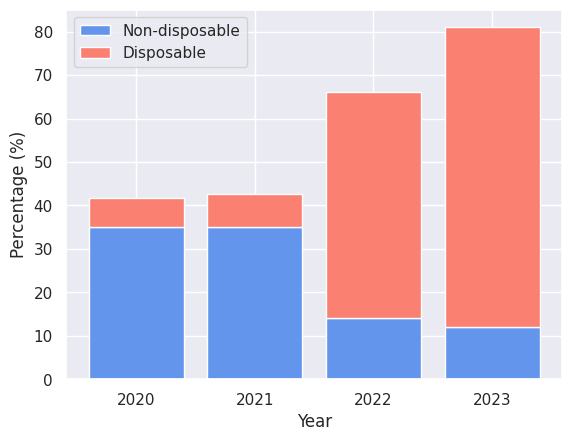

<Figure size 640x480 with 0 Axes>

In [ ]:
#Stacked bar plot for e-cig use by device

x = disposable['Year']
y1 = disposable['Non-disposable']
y2 = disposable['Disposable']

plt.bar(x, y1, color='cornflowerblue')
plt.bar(x, y2, bottom=y1, color='salmon')

plt.xticks([2020, 2021, 2022, 2023])
plt.legend([])

plt.xlabel("Year")
plt.ylabel("Percentage (%)")
# plt.title("Most frequently used e-cigarette by device type in e-cig users aged 11-17")
plt.legend(['Non-disposable', 'Disposable'])
plt.show()
plt.clf()

We can see a dramatic rise, with the vast majority of young people using disposable vapes for their most frequent e-cigarette use.

## Conclusion

Although evidence shows that government mitigations are effective in bringing down smoking rates, the rise in e-cigarette use is a concern. A steady rise in use as expected as smoking rates decrease and e-cigarettes are used as quitting tools or less harmful alternatives to smoking. However the very sharp increase of e-cigarette use in younger people is far above the expected rate, considerably higher than the recent smoking rate in this demographic. Government mitigations on vaping should therefore be focussed on young people; without mitigations the rate of vaping in young people could rise exponentially.

The planned ban on disposable vapes is likely to reduce the e-cigarette usage rate in young people, with an overwhelming majority of those 11-17 using disposable vapes most frequently, although this will also benefit other age groups. The UK government have stated that alongside banning disposable vapes, measures will be brought forward to to restrict vape flavours, displays and packaging, to make them less attractive to children. Our MPOWER analysis shows that government mitigations effectively reduced smoking rates by including measures on displays and advertising, therefore this ban is likely to be effective and curb the rise in the vaping rate in young people by introducing restrictions in these areas, particularly as vaping flavours and colours are more attractive to younger people.


In [ ]:
## Question Two:
Based on this analysis, how effective will the new ban be on reducing smoking prevalence and mortality?

Object `mortality` not found.


## Analysis Five - Identify non government intervention factors that may impact on smoking rates

Although smoking rates correlate with factors such as affordability and e-cigarette use that the government may have some control over, smoking rates are also potentially influenced by other factors.

To identify these we analysed the changes in smoking habits from 2014 to 2022, to determine if other factors could be influencing the rates.

The first variable we looked at was to see if there were any differences between smoking rates for people with different levels of education.


In [ ]:
# Load the CSV file
url = ("https://raw.githubusercontent.com/rhobaker/Data_Project/main/ONS_smoking_habits_in_the_uk_and_its_constituent_countries/Table_9.csv")

data = pd.read_csv(url)

# Display the first few rows to understand its structure
data

,Country code,Country,Highest level of education,2022 \nCurrent smokers \n%,2022\nCurrent smokers \nLCL,2022 \nCurrent smokers \nUCL,2022\nEx-smokers \n%,2022 \nEx-smokers \nLCL,2022 \nEx-smokers \nUCL,2022 \nNever smoked \n%,...,2014 \nCurrent smokers \nLCL,2014 \nCurrent smokers \nUCL,2014 \nEx-smokers \n%,2014 \nEx-smokers \nLCL,2014 \nEx-smokers \nUCL,2014 \nNever smoked \n%,2014 \nNever smoked \nLCL,2014 \nNever smoked \nUCL,2014 \nWeighted count \n[note 2],2014 \nSample size \n[note 3]
0,E92000001,England,Degree or equivalent,6.6,6.2,7.1,18.7,18.2,19.3,74.6,...,9.3,10.1,32.7,32.2,33.3,57.5,56.9,58.2,"9,337,102","37,603"
1,E92000001,England,Higher education,11.0,9.9,12.2,26.7,25.3,28.1,62.2,...,13.3,14.8,36.5,35.6,37.5,49.4,48.4,50.4,"2,958,605","13,151"
2,E92000001,England,GCE A level or equivalent,13.9,13.2,14.6,23.7,22.9,24.4,62.4,...,18.7,19.8,31.5,30.9,32.1,49.2,48.6,49.9,"7,805,376","33,141"
3,E92000001,England,GCSE grades A*-C or equivalent,19.2,18.3,20.1,26.0,25.1,26.8,54.8,...,24.7,25.9,31.0,30.4,31.7,43.6,43.0,44.3,"6,895,661","30,446"
4,E92000001,England,Other qualification,24.2,22.6,25.8,23.2,21.9,24.5,52.6,...,27.1,28.9,28.9,28.0,29.8,43.1,42.1,44.0,"3,437,512","15,117"
5,E92000001,England,No qualifications,26.1,24.5,27.7,25.5,24.0,26.9,48.5,...,30.2,32.0,29.3,28.5,30.2,39.5,38.6,40.5,"3,357,670","15,885"
6,W92000004,Wales,Degree or equivalent,7.3,5.6,9.0,17.8,16.2,19.3,74.9,...,8.3,10.3,33.2,31.5,34.8,57.5,55.7,59.3,"468,307","4,993"
7,W92000004,Wales,Higher education,13.0,10.1,15.9,23.2,20.1,26.3,63.9,...,13.4,16.7,34.5,32.4,36.6,50.4,48.2,52.7,"203,651","2,419"
8,W92000004,Wales,GCE A level or equivalent,14.2,12.5,15.9,21.2,19.5,23.0,64.6,...,19.2,22.1,31.9,30.4,33.4,47.5,45.8,49.2,"475,544","5,094"
9,W92000004,Wales,GCSE grades A*-C or equivalent,20.3,18.1,22.6,25.2,23.0,27.5,54.4,...,24.6,27.5,29.1,27.6,30.6,44.9,43.2,46.5,"419,500","4,794"


In [ ]:
# Clean the column names
data.columns = data.columns.str.replace('\n', ' ').str.replace(' ', '_').str.replace('__', '_').str.strip()
print(data.columns.tolist())
['Country_code', 'Country', 'Highest_level_of_education', '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022__Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021__Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-smokers_%', '2019_Ex-smokers_LCL', '2019_Ex-smokers_UCL', '2019_Never_smoked_%', '2019_Never_smoked_LCL', '2019_Never_smoked_UCL', '2019_Weighted_count_[note_2]', '2019_Sample_size_[note_3]', '2018_Current_smokers_%', '2018_Current_smokers_LCL', '2018_Current_smokers_UCL', '2018_Ex-smokers_%', '2018_Ex-smokers_LCL', '2018_Ex-smokers_UCL', '2018_Never_smoked_%', '2018_Never_smoked_LCL', '2018_Never_smoked_UCL', '2018_Weighted_count_[note_2]', '2018_Sample_size_[note_3]', '2017_Current_smokers_%', '2017_Current_smokers_LCL', '2017_Current_smokers_UCL', '2017_Ex-smokers_%', '2017_Ex-smokers_LCL', '2017_Ex-smokers_UCL', '2017_Never_smoked_%', '2017_Never_smoked_LCL', '2017_Never_smoked_UCL', '2017_Weighted_count_[note_2]', '2017_Sample_size_[note_3]', '2016_Current_smokers_%', '2016_Current_smokers_LCL', '2016_Current_smokers_UCL', '2016_Ex-smokers_%', '2016_Ex-smokers_LCL', '2016_Ex-smokers_UCL', '2016_Never_smoked_%', '2016_Never_smoked_LCL', '2016_Never_smoked_UCL', '2016_Weighted_count_[note_2]', '2016_Sample_size_[note_3]', '2015_Current_smokers_%', '2015_Current_smokers_LCL', '2015_Current_smokers_UCL', '2015_Ex-smokers_%', '2015_Ex-smokers_LCL', '2015_Ex-smokers_UCL', '2015_Never_smoked_%', '2015_Never_smoked_LCL', '2015_Never_smoked_UCL', '2015_Weighted_count_[note_2]', '2015_Sample_size_[note_3]', '2014_Current_smokers_%', '2014_Current_smokers_LCL', '2014_Current_smokers_UCL', '2014_Ex-smokers_%', '2014_Ex-smokers_LCL', '2014_Ex-smokers_UCL', '2014_Never_smoked_%', '2014_Never_smoked_LCL', '2014_Never_smoked_UCL', '2014_Weighted_count_[note_2]', '2014_Sample_size_[note_3]']
# Adjusted column names based on the inspection
columns_of_interest = [
    'Country', 'Highest_level_of_education',
    '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

# Select relevant columns for the year 2022
data_2022 = data[columns_of_interest].copy()
data_2022

['Country_code', 'Country', 'Highest_level_of_education', '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022__Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021__Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-

,Country,Highest_level_of_education,2022_Current_smokers_%,2022_Current_smokers_LCL,2022_Current_smokers_UCL,2022_Ex-smokers_%,2022_Ex-smokers_LCL,2022_Ex-smokers_UCL,2022_Never_smoked_%,2022_Never_smoked_LCL,2022_Never_smoked_UCL
0,England,Degree or equivalent,6.6,6.2,7.1,18.7,18.2,19.3,74.6,74.0,75.3
1,England,Higher education,11.0,9.9,12.2,26.7,25.3,28.1,62.2,60.6,63.8
2,England,GCE A level or equivalent,13.9,13.2,14.6,23.7,22.9,24.4,62.4,61.5,63.4
3,England,GCSE grades A*-C or equivalent,19.2,18.3,20.1,26.0,25.1,26.8,54.8,53.8,55.9
4,England,Other qualification,24.2,22.6,25.8,23.2,21.9,24.5,52.6,50.9,54.3
5,England,No qualifications,26.1,24.5,27.7,25.5,24.0,26.9,48.5,46.7,50.2
6,Wales,Degree or equivalent,7.3,5.6,9.0,17.8,16.2,19.3,74.9,72.8,77.0
7,Wales,Higher education,13.0,10.1,15.9,23.2,20.1,26.3,63.9,60.2,67.5
8,Wales,GCE A level or equivalent,14.2,12.5,15.9,21.2,19.5,23.0,64.6,62.2,66.9
9,Wales,GCSE grades A*-C or equivalent,20.3,18.1,22.6,25.2,23.0,27.5,54.4,51.7,57.1


In [ ]:

# Convert percentage columns to numeric
percentage_columns = [
    '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

for col in percentage_columns:
    data_2022[col] = pd.to_numeric(data_2022[col], errors='coerce')

# Check for missing data
missing_data_summary = data_2022.isnull().sum()
print(missing_data_summary)
data_2022 = data_2022[data_2022.Country.isin(["United Kingdom"])]
data_2022

Country                       0
Highest_level_of_education    0
2022_Current_smokers_%        0
2022_Current_smokers_LCL      0
2022_Current_smokers_UCL      0
2022_Ex-smokers_%             0
2022_Ex-smokers_LCL           0
2022_Ex-smokers_UCL           0
2022_Never_smoked_%           0
2022_Never_smoked_LCL         0
2022_Never_smoked_UCL         0
dtype: int64


,Country,Highest_level_of_education,2022_Current_smokers_%,2022_Current_smokers_LCL,2022_Current_smokers_UCL,2022_Ex-smokers_%,2022_Ex-smokers_LCL,2022_Ex-smokers_UCL,2022_Never_smoked_%,2022_Never_smoked_LCL,2022_Never_smoked_UCL
24,United Kingdom,Degree or equivalent,6.5,6.1,6.9,18.6,18.1,19.1,74.8,74.2,75.5
25,United Kingdom,Higher education,11.5,10.6,12.5,25.8,24.7,27.0,62.7,61.4,64.0
26,United Kingdom,GCE A level or equivalent,14.0,13.4,14.6,23.4,22.7,24.1,62.6,61.8,63.4
27,United Kingdom,GCSE grades A*-C or equivalent,19.5,18.7,20.2,26.0,25.2,26.7,54.6,53.6,55.5
28,United Kingdom,Other qualification,24.5,23.1,25.9,23.3,22.1,24.5,52.2,50.7,53.7
29,United Kingdom,No qualifications,27.2,25.8,28.5,24.9,23.7,26.1,48.0,46.5,49.4


In [ ]:
data_to_merge = pd.DataFrame(data_2022[["Highest_level_of_education",'2022_Current_smokers_%']])
data_to_merge.set_index(["Highest_level_of_education"], inplace = True)
levels_data = {
  "Highest_level_of_education": ["Degree or equivalent", "Higher education", "GCE A level or equivalent", "GCSE grades A*-C or equivalent", "Other qualification", "No qualifications"],
  "Total Population Percentage": [21,9,22,21,12,14]
}
levels_df = pd.DataFrame(levels_data)
levels_df.set_index(["Highest_level_of_education"], inplace = True)
merged_qual_data = pd.merge(levels_df, data_to_merge, left_index=True, right_index=True, how='outer' )
merged_qual_data

,Total Population Percentage,2022_Current_smokers_%
Highest_level_of_education,,
Degree or equivalent,21,6.5
Higher education,9,11.5
GCE A level or equivalent,22,14.0
GCSE grades A*-C or equivalent,21,19.5
Other qualification,12,24.5
No qualifications,14,27.2


In [ ]:
#Correlation coefficient
smokers_young_arr = np.array(smokers['All 16-24'].loc[:8])
vapers_young_arr = np.array(vapers['All 16-24'].loc[:8])

ed_level_coeff = np.corrcoef(merged_qual_data["Total Population Percentage"], merged_qual_data["2022_Current_smokers_%"])
smoke_vape_young_coeff

array([[ 1.      , -0.885275],
       [-0.885275,  1.      ]])

>> Quick check of education rates online:
Degree: 21
HEd: 9
A level: 22
GCSE: 21
Other: 12
None: 14
>> Plotted them together to make sure that there was a difference based on level of education and it wasn't just mirroring the population as a whole.
>> String negative correlation, so worth doing this analysis properly.
>> Data from:
https://www.ons.gov.uk/peoplepopulationandcommunity/educationandchildcare/adhocs/10516highestlevelofqualificationachievedbypeoplelivinginukregions2010to2018

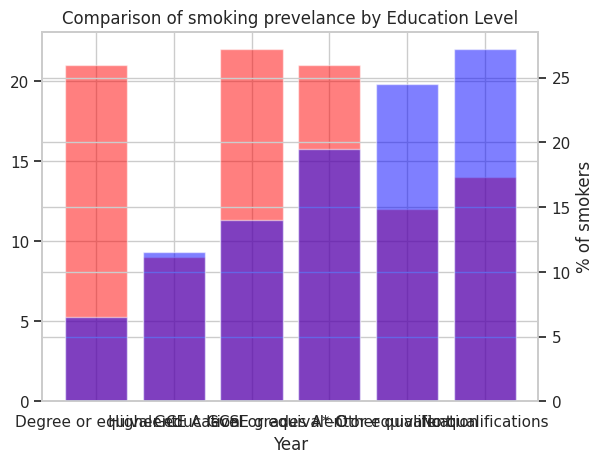

<Figure size 640x480 with 0 Axes>

In [ ]:
#Create a visualisation to compare the proportion of cigarette smokers vs the expenditure on tobacco
sns.set_theme(style="whitegrid")
fig, ax10 = plt.subplots()
plt.title("Comparison of smoking prevelance by Education Level")
ax10.set_xlabel("Year")
# Plot smoking rate
plt.bar(merged_qual_data.index.tolist(), merged_qual_data['Total Population Percentage'], color = "red", alpha = 0.5)

ax10.set_ylabel = "Proportion of total population (%)"
ax10.tick_params(axis='y')

# Adding Twin Axes to plot smoking rates
ax11 = ax10.twinx()
ax11.set_ylabel("% of smokers")
plt.bar(merged_qual_data.index.tolist(), merged_qual_data['2022_Current_smokers_%'], color = "blue", alpha = 0.5)
ax11.tick_params(axis='y')

# Show plot
plt.show()
plt.clf()


Analysis of Smoking Habits by Education Level (2022)
1. Current Smokers by Education Level

The key observations are:

There is a noticeable variation in the percentage of current smokers among different education levels.
Individuals with lower educational attainment tend to have higher smoking rates. This could be due to a variety of socio-economic factors, including limited access to health education and resources. Lower Smoking Rates in Higher Education Levels: Conversely, those with higher education levels generally show
Higher education often correlates with greater health awareness and healthier lifestyles.
2. Ex-Smokers by Education Level

The key observations are:

The percentage of ex-smokers varies moderately across different education levels. Generally, individuals with higher educational attainment are more likely to have quit smoking. This might reflect better access to smoking cessation programs and greater health literacy.
Lower education levels show a smaller percentage of ex-smokers, suggesting challenges in quitting smoking, possibly due to socio-economic factors and limited access to support resources.
3. Never Smoked by Education Level

Key observations are:

The percentage of individuals who have never smoked generally mirrors the trend observed in current smokers, with higher rates in those with higher education levels.
There is a higher percentage of individuals who have never smoked among those with higher educational attainment. This could be attributed to greater health awareness and lifestyle choices associated with higher education.
Conversely, lower education levels have a smaller percentage of individuals who have never smoked, indicating a higher propensity towards smoking initiation in these groups.
To summarise:
The three charts collectively highlight the significant impact of education on smoking behaviors.

Higher education levels are associated with lower rates of current smoking and higher rates of never smoking and quitting smoking.

These patterns underscore the importance of education as a determinant of health behaviours and suggest that public health interventions aiming to reduce smoking prevalence may benefit from focusing on educational initiatives and targeted support for lower education groups.

Addressing socio-economic disparities and enhancing access to health education and smoking cessation resources could further help in reducing smoking rates across all education levels.

In [ ]:
# Display the cleaned column names
print(data.columns.tolist())

# Extract the years present in the dataset based on column names
years = list(set([col.split('_')[0] for col in data.columns if col.split('_')[0].isdigit()]))
print("Years found in the dataset:", years)

# List of smoking status categories
smoking_statuses = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']

# Correct column names for melting
columns_to_melt = {}
for status in smoking_statuses:
    columns_to_melt[status] = [col for col in data.columns if status in col]

print("Columns to melt for each status:", columns_to_melt)

# Initialize an empty list to store dataframes
dfs = []

# Loop through each smoking status to melt the data
for status, status_cols in columns_to_melt.items():
    status_df = data.melt(id_vars=['Country', 'Highest_level_of_education'],
                          value_vars=status_cols,
                          var_name='Year_Status',
                          value_name=status)

    # Extract year from the combined Year_Status column
    status_df['Year'] = status_df['Year_Status'].str.extract('(\d{4})').astype(int)

    # Drop the Year_Status column
    status_df = status_df.drop(columns=['Year_Status'])

    # Append the melted dataframe to the list
    dfs.append(status_df)

# Merge the dataframes on common columns
data_long = dfs[0]
for df in dfs[1:]:
    data_long = pd.merge(data_long, df, on=['Country', 'Highest_level_of_education', 'Year'])

print(data_long.head())

['Country_code', 'Country', 'Highest_level_of_education', '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022__Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021__Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-

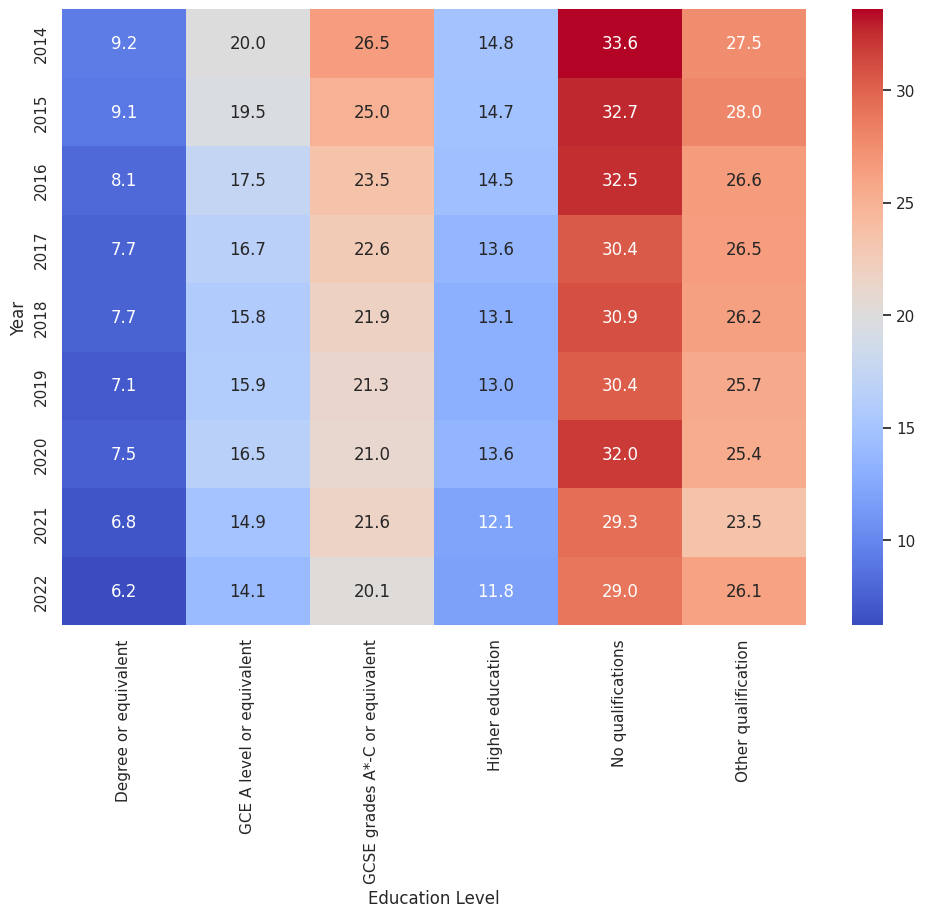

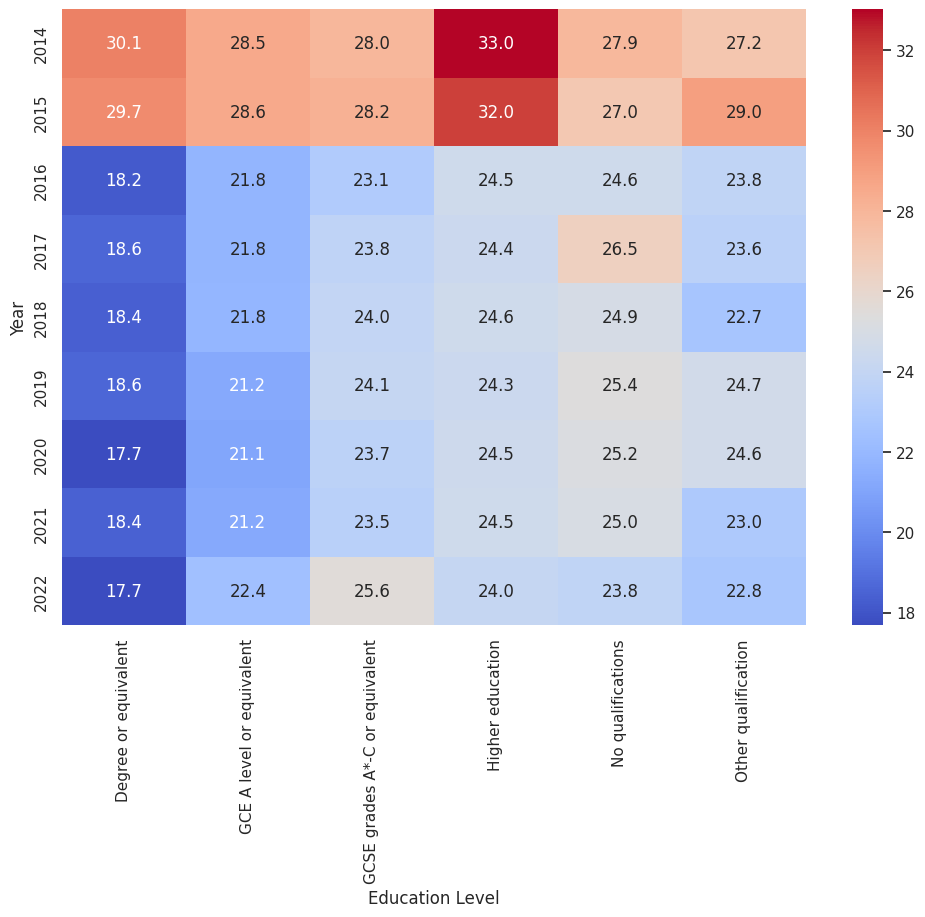

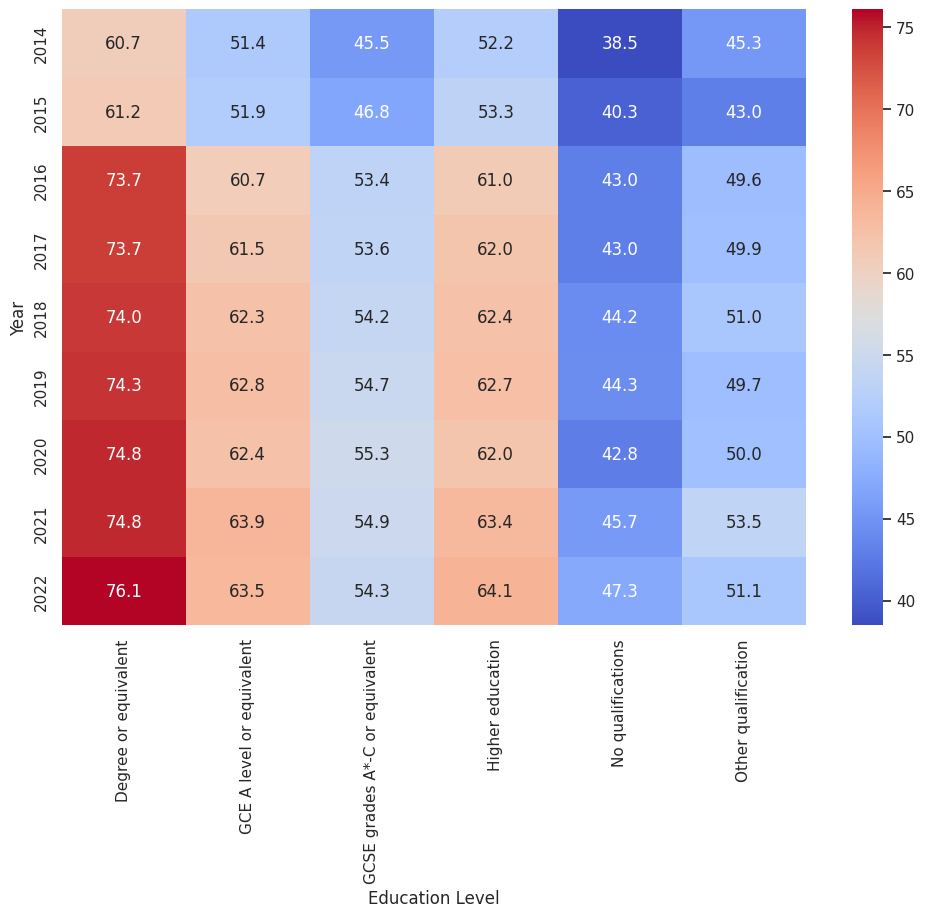

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a heatmap for each smoking category by education level and year
smoking_categories = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']
heatmap_titles = ['Current Smokers', 'Ex-Smokers', 'Never Smoked']

for category, title in zip(smoking_categories, heatmap_titles):
    heatmap_data = data_long.pivot_table(index='Year', columns='Highest_level_of_education', values=category)

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
    # plt.title(f'Heatmap of {title} by Education Level (2014-2022)')
    plt.ylabel('Year')
    plt.xlabel('Education Level')
    plt.show()

plt.clf()

The following analysis is based on three heatmaps depicting the trends of current smokers, ex-smokers, and individuals who have never smoked by education level from 2014 to 2022. Each heatmap highlights the variations and trends in smoking behaviors across different education levels over the years.

Current Smokers by Education Level
There are clear, consistent patterns across education levels, with some variations over the years.
Individuals with lower education levels consistently show higher smoking rates throughout the observed period. This suggests a persistent trend where lower educational attainment is associated with higher smoking prevalence.
Overall, there is a gradual decline in the percentage of current smokers across all education levels, indicating the effectiveness of public health initiatives aimed at reducing smoking rates.
Ex-Smokers by Education Level
There is a noticeable increase in the percentage of ex-smokers across most education levels, particularly in higher education groups.
Individuals with higher educational attainment consistently show higher quit rates, suggesting better access to resources and a greater emphasis on healthy behaviors.
Never Smoked by Education Level
The trends observed here generally mirror those of current smokers but in the opposite direction, with higher percentages of never smokers in higher education levels.
The percentage of never smokers remains relatively stable over time, with slight increases in higher education groups.
Overall summary:
Persistent Disparities: Despite the overall decline, the gap between higher and lower education levels remains significant, highlighting the need for targeted interventions.
Potential Influences: Economic factors, health literacy, and access to smoking cessation resources likely contribute to the observed disparities.
The correlation between higher education levels and higher quit rates underscores the importance of education in smoking cessation efforts.
Higher education levels are strongly associated with a higher likelihood of never smoking, indicating the preventive role of education.

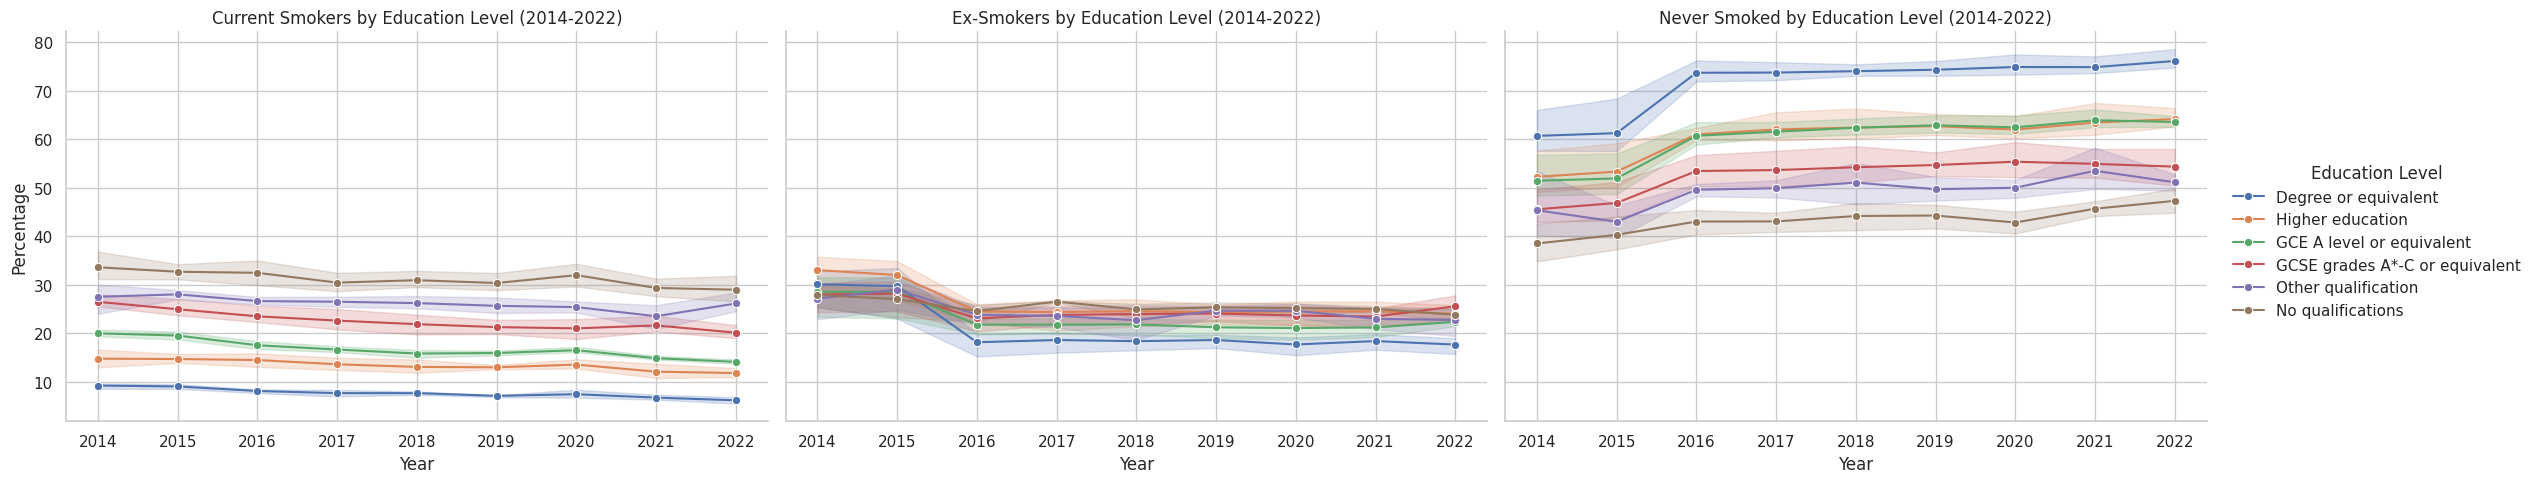

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prepare the data for facet grid
data_long_melted = data_long.melt(id_vars=['Year', 'Highest_level_of_education'], value_vars=smoking_categories,
                                  var_name='Smoking_Category', value_name='Percentage')

# Create a facet grid for the smoking categories
g = sns.FacetGrid(data_long_melted, col='Smoking_Category', hue='Highest_level_of_education', col_order=smoking_categories, height=5, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Percentage', marker='o')
g.add_legend(title='Education Level')

# Set the titles for each facet
facet_titles = {
    'Current_smokers_%': 'Current Smokers by Education Level (2014-2022)',
    'Ex-smokers_%': 'Ex-Smokers by Education Level (2014-2022)',
    'Never_smoked_%': 'Never Smoked by Education Level (2014-2022)'
}

for ax in g.axes.flat:
    ax.set_title(facet_titles[ax.get_title().split('=')[1].strip()])

plt.show()
plt.clf()

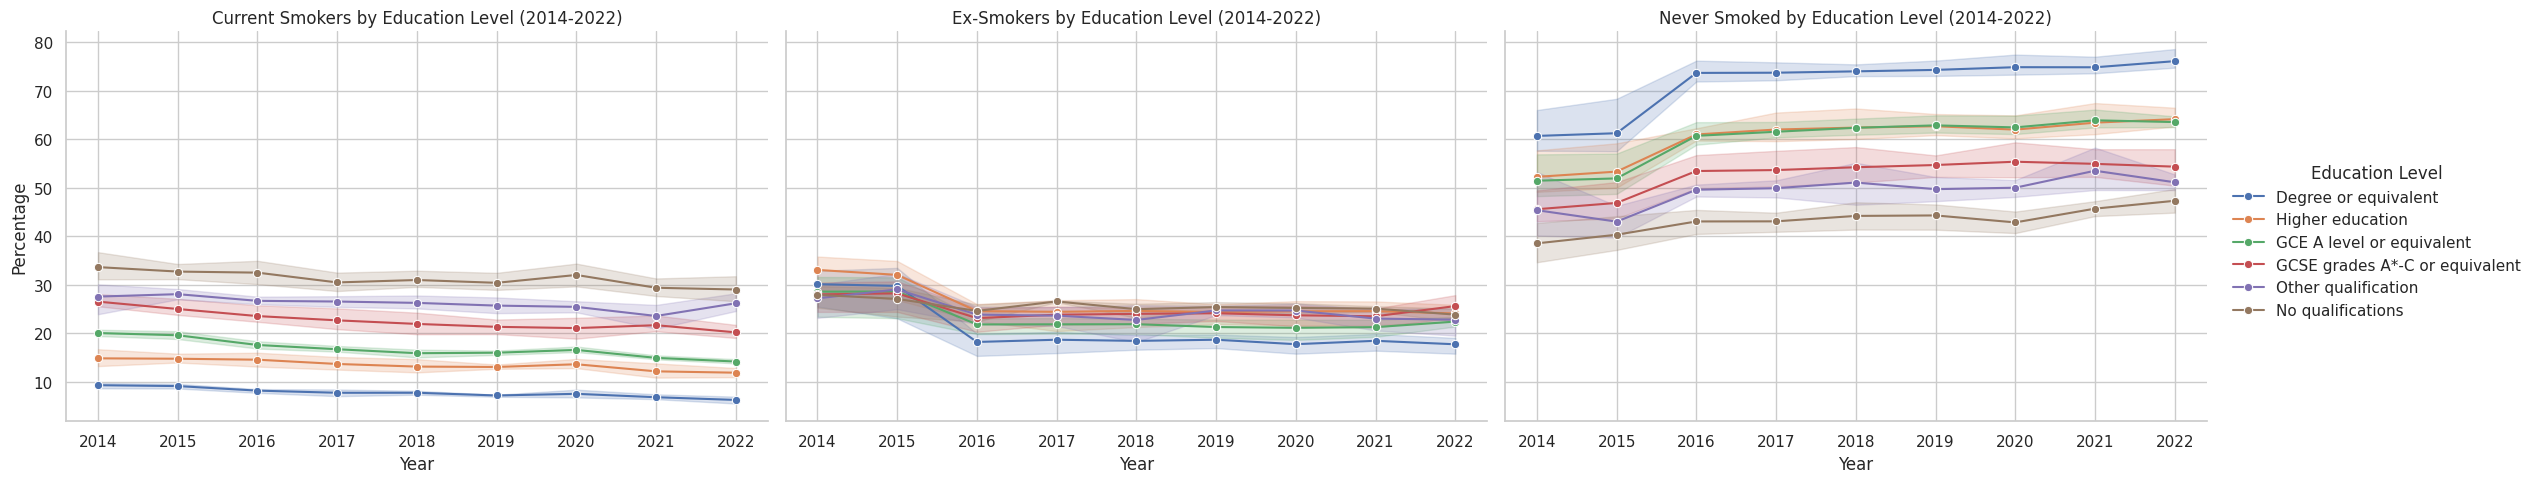

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prepare the data for facet grid
data_long_melted = data_long.melt(id_vars=['Year', 'Highest_level_of_education'], value_vars=smoking_categories,
                                  var_name='Smoking_Category', value_name='Percentage')

# Create a facet grid for the smoking categories
g = sns.FacetGrid(data_long_melted, col='Smoking_Category', hue='Highest_level_of_education', col_order=smoking_categories, height=5, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Percentage', marker='o')
g.add_legend(title='Education Level')

# Set the titles for each facet
facet_titles = {
    'Current_smokers_%': 'Current Smokers by Education Level (2014-2022)',
    'Ex-smokers_%': 'Ex-Smokers by Education Level (2014-2022)',
    'Never_smoked_%': 'Never Smoked by Education Level (2014-2022)'
}

for ax in g.axes.flat:
    ax.set_title(facet_titles[ax.get_title().split('=')[1].strip()])

plt.show()
plt.clf()

>> Maybe need to look at another factor quickly??
>> Economic factors??

Key Insights
Education as a Key Determinant:

Education level is a significant determinant of smoking behaviors. Higher education levels are consistently linked with lower smoking rates, higher quit rates, and a higher likelihood of never smoking.

Effectiveness of Public Health Efforts:

The overall decline in current smoking rates and the increase in ex-smokers indicate that public health efforts are making a positive impact. However, the persistent disparities between education levels highlight the need for more targeted interventions.

Targeted Interventions Needed:

To further reduce smoking prevalence and promote cessation, targeted interventions should focus on lower education groups. Enhancing access to health education, smoking cessation programs, and resources for these groups is crucial.

Preventive Measures:

EmphasiSing preventive measures in education, particularly in lower education groups, could help reduce the initiation of smoking. This includes integrating comprehensive smoking prevention programs into school curriculum and community outreach initiatives.

### QUESTION ONE - CONCLUSIONS:

Our analysis set out to answer the question:


**How effective does historic data suggest that government mitigations have been on affecting smoking prevalence?**


Firstly, we determined that global smoking rates reduced from 28.1% in 2007 to 20.9% in 2022 and that this strongly correlated to government intervention measures increasing over the same period.

When then focused our analysis on the UK to see if it followed this global trend. We saw a similar movement in smoking rates, reducing from 27.0% in 2000 to 15.6% in 2019.  This can be seen to link with government intervention measures around packaging and advertising becoming more stringent.

Our analysis of the tax paid on a packet of cigarettes shows that...

As tax has significantly increased the price of cigarettes, we can see that the affordability of tobacco has decreased.  This strongly correlates with the decrease in smoking rates and from this we can infer that decreasing the affordability of tobacco by increasing taxes is linked to a reduction in the overall smoking rate.

We then looked at the impact of e-cigarettes on changes in the overall tobacco smoking rate as anecdotal evidence and our own personal experiences suggest that there has been a significant increase in e-cigarette use in the past few years.

Our analysis shows that as e-cigarette use has increased, the smoking rate has decreased, however the spike in e-cigarette use is disproportionally due to the younger generation, therefore how much impact this is having on overall smoking rates is harder to determine.

Finally we examined the available data to see if other socio-economic factors could be influencing the drop in smoking rate, outside of direct government control.

We could see that there was a clear link between education level and smoking rates; the higher the education level someone has the less likely they are to smoke.  *As education levels have been increasing over recent years this is likely to have had an influence on smoking rates decreasing.*

When we did a similar analysis for differences between smoking rates in men and women we could not see any similar trends, so we concluded that any future government interventions should equally consider both men and women when their implmentation is planned.

The evidence therefore suggests that smoking rates will continue to fall if the future government, elected in the July 2024 UK general election, continues to tighten legislation and increase tax in a similar way to previous ones.  Socio-economic trends influencing e-cigarette use and education levels may also impact this reduction.